# Principal Component Analysis

Last time we talked about SVM without having any pictures because our example was basically a hyperplane in a four-dimensional space.

Could we produce some pretty figures though? Everyone loves pictures than codes.

We'll talk about reducing the dimension of the feature space today. By projecting the scatter plot in 4D onto a nice 2D subspace, we should be able to visualize the distribution of the iris data.

In general, projecting points onto a lower dimensional subspace corresponds to reducing the number of features that we use for classifying the data. Its use is nowhere limited to data visualization, the true purpose is to capture the key features describing the data and also avoid very expensive computation. There are many ways to achieve it, and we are going to see the **principal component analysis** (PCA) today.

Let's start with the iris data <a href="Support-Vector_Machines.html">as before</a>.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()
print(iris.data.shape)

(150, 4)


This data is made out of 150 sample vectors in 4D space.

If you'd like to jump to the code for PCA, here's a <a href="#code">wormhole</a>.

## What does PCA do?

When you look up the <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Wikipedia page</a>, it explains that PCA is indeed a change of coordinates, in particular an orthogonal linear transformation such that the first new axis directs where the cluster of data are the most widespread, the second new axis the second most widespread, etc.

I wouldn't have to repeat this introduction, instead I'll rephrase the algorithm it a little in a way that I find more comfortable. At its heart, we are looking at the eigenvectors of the covariance matrix $X^T X$ of the normalized data matrix $X$.
- Suppose the data matrix $X$ is given by each row representing a single observation. If the sample size is $m$ with $n$ features, we have an $m \times n$ matrix $X$.
- Each column corresponds to all sample data for the corresponding feature. Normalize $X$ by subtracting the column-means from each column.
- Then $X^T X$ is the usual covariance matrix of $X$.
- Now the usual scatter plot of the data ($m$ points) in the feature space of dimension $n$ has the axes given by the column vectors of $X$, say $X_1, X_2, ..., X_n$.
- Finding the first principal component corresponds to making a linear transformation
$$X_1 \mapsto a_1 X_1 + a_2 X_2 + \cdots a_n X_n$$
such that the variance along this new axis
$$(a_1 X_1 + a_2 X_2 + \cdots a_n X_n)^T (a_1 X_1 + a_2 X_2 + \cdots a_n X_n)$$
is maximized.
- Say $\textbf{v} = (a_1, a_2, ..., a_n)$ is a column vector. Then the above is just maximizing
$$(X \textbf{v})^T(X \textbf{v}) = <\textbf{v}, X^T X \textbf{v}>.$$
- We know this is achieved when $\textbf{v}$ is an eigenvector of $X^T X$ with the largest eigenvalue.
- Assuming that $X$ has the full rank, $X^T X$ is a positive definite matrix which we can order the eigenvalues as
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0$$
with the corresponding choice of erigenvectors
$$\textbf{v}_1, \textbf{v}_2, ..., \textbf{v}_n.$$
- The $i$'th principal component is then nothing but $X \textbf{v}_i$. A linear combination of features $X_1, ..., X_n$ is again a feature, and to make a distinction the $X \textbf{v}_i$'s are somehow less original than $X_i$'s, the original features $X_i$ from the data $X$ are sometimes called *attributes*. Of course there's no significant difference mathematically.

The change of coordinates
$$\{ X_1, ..., X_n \} \mapsto \{ X \textbf{v}_1, ..., X \textbf{v}_n \}$$
in $n$-dimensional space corresponds to the matrix multiplication which the columns of the matrix is exactly $n$ number of $n$-dimensional vectors $\textbf{v}_i$.

Then where does the dimension reduction come in?

From the decreasing sequence of positive eigenvalues
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_n \geq 0,$$
we understand that the smaller eigenvalues correspond to the smaller variance of the scatter plot along the direction of the corresponding eigenvectors. So we make an arbitrary decision by "cutting out the axes $X \textbf{v}_{i > c}$ with low eigenvalues", i.e., orthogonally projecting the scatter plots to the subspace spanned by
$$X \textbf{v}_1, X \textbf{v}_2, ..., X \textbf{v}_c.$$

Enough said, time for the Python code! This is achieve by essentially a single line of code, again causing a neverending argument between the educators and the students :)

<a name="code"></a>

In [2]:
from sklearn.decomposition import PCA

x_pca = PCA().fit_transform(iris.data)
print(type(x_pca))
print(x_pca.shape)

<class 'numpy.ndarray'>
(150, 4)


As promised, the transformed data `x_pca` according to PCA still has four features. It's our arbitrary decision to just take "the best two features". I'm choosing two because with only two new features, we can scatterplot the projected data points in a 2D figure.

<IPython.core.display.Javascript object>


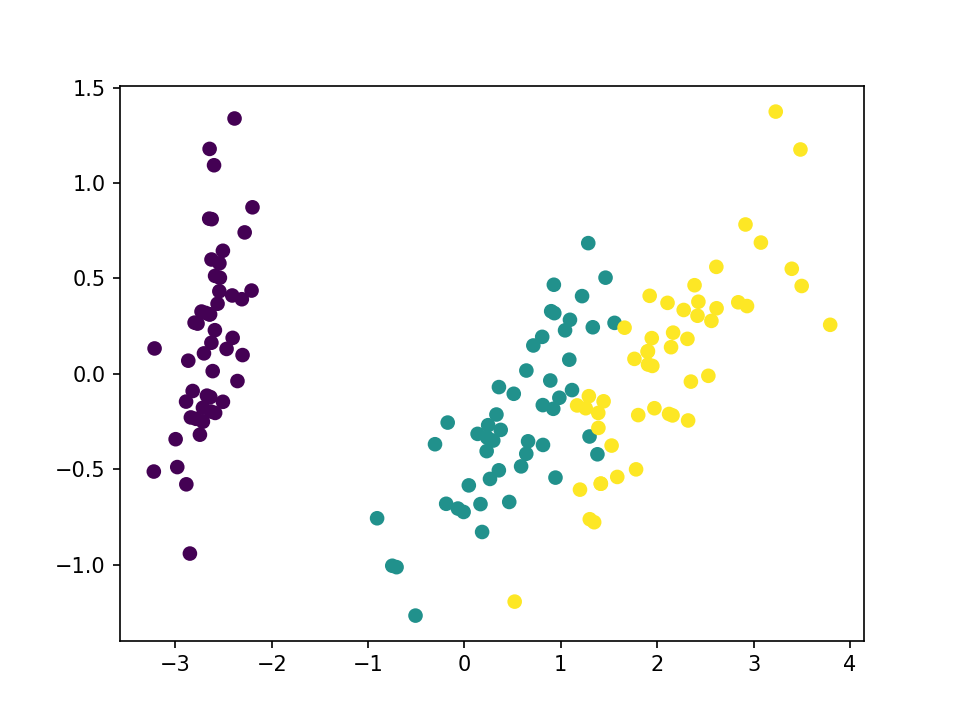

In [3]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = iris.target)
plt.show()

Just a remark, we see that the purple cluster is obviously distinct from the other two groups, but the other two groups are impossible to be perfectly seperated by <a href="Support-Vector_Machines.html">linear SVM</a> in this 2D subspace.

If time permits, I would introduce another dimension-reduction method called **t-distributed stochastic neighbor embedding (t-SNE)** later.